### **Melakukan prediksi mengenai gangguan tidur menggunakan kNN berdasarkan physical activity level dan heart rate.**

1. Importing libraries.

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, accuracy_score

Baca Dataset.

In [3]:
#read dataset
data = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


2. Melakukan penghapusan data kolom yang tidak diperlukan.

In [4]:
data.drop(columns="Person ID", inplace=True)

3. Ubah label menjadi numerik dengan label encoder dengan keterangan sebagai berikut:


*   0 = Insomnia
*   1 = None (Tidak memiliki gangguan tidur)
*   2 = Sleep Apnea



In [5]:
data.groupby('Sleep Disorder').size()

Sleep Disorder
Insomnia        77
None           219
Sleep Apnea     78
dtype: int64

In [6]:
y = data.iloc[:,-1].values

In [7]:
#Label encoding dengan labelencoder dengan 0 = Insomnia, 1 = None, 2 = Sleep Apnea
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
print(y)

[1 1 1 2 2 0 0 1 1 1 1 1 1 1 1 1 2 2 0 1 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 2 2 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 2
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 2 0 1 2 2 2 2 2 2 2 2 2 2 0 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 1 1 1 2 2 2 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


4. Melakukan visualisasi data sebagai perbandingan faktor yang mempengaruhi gangguan tidur.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 640x480 with 0 Axes>

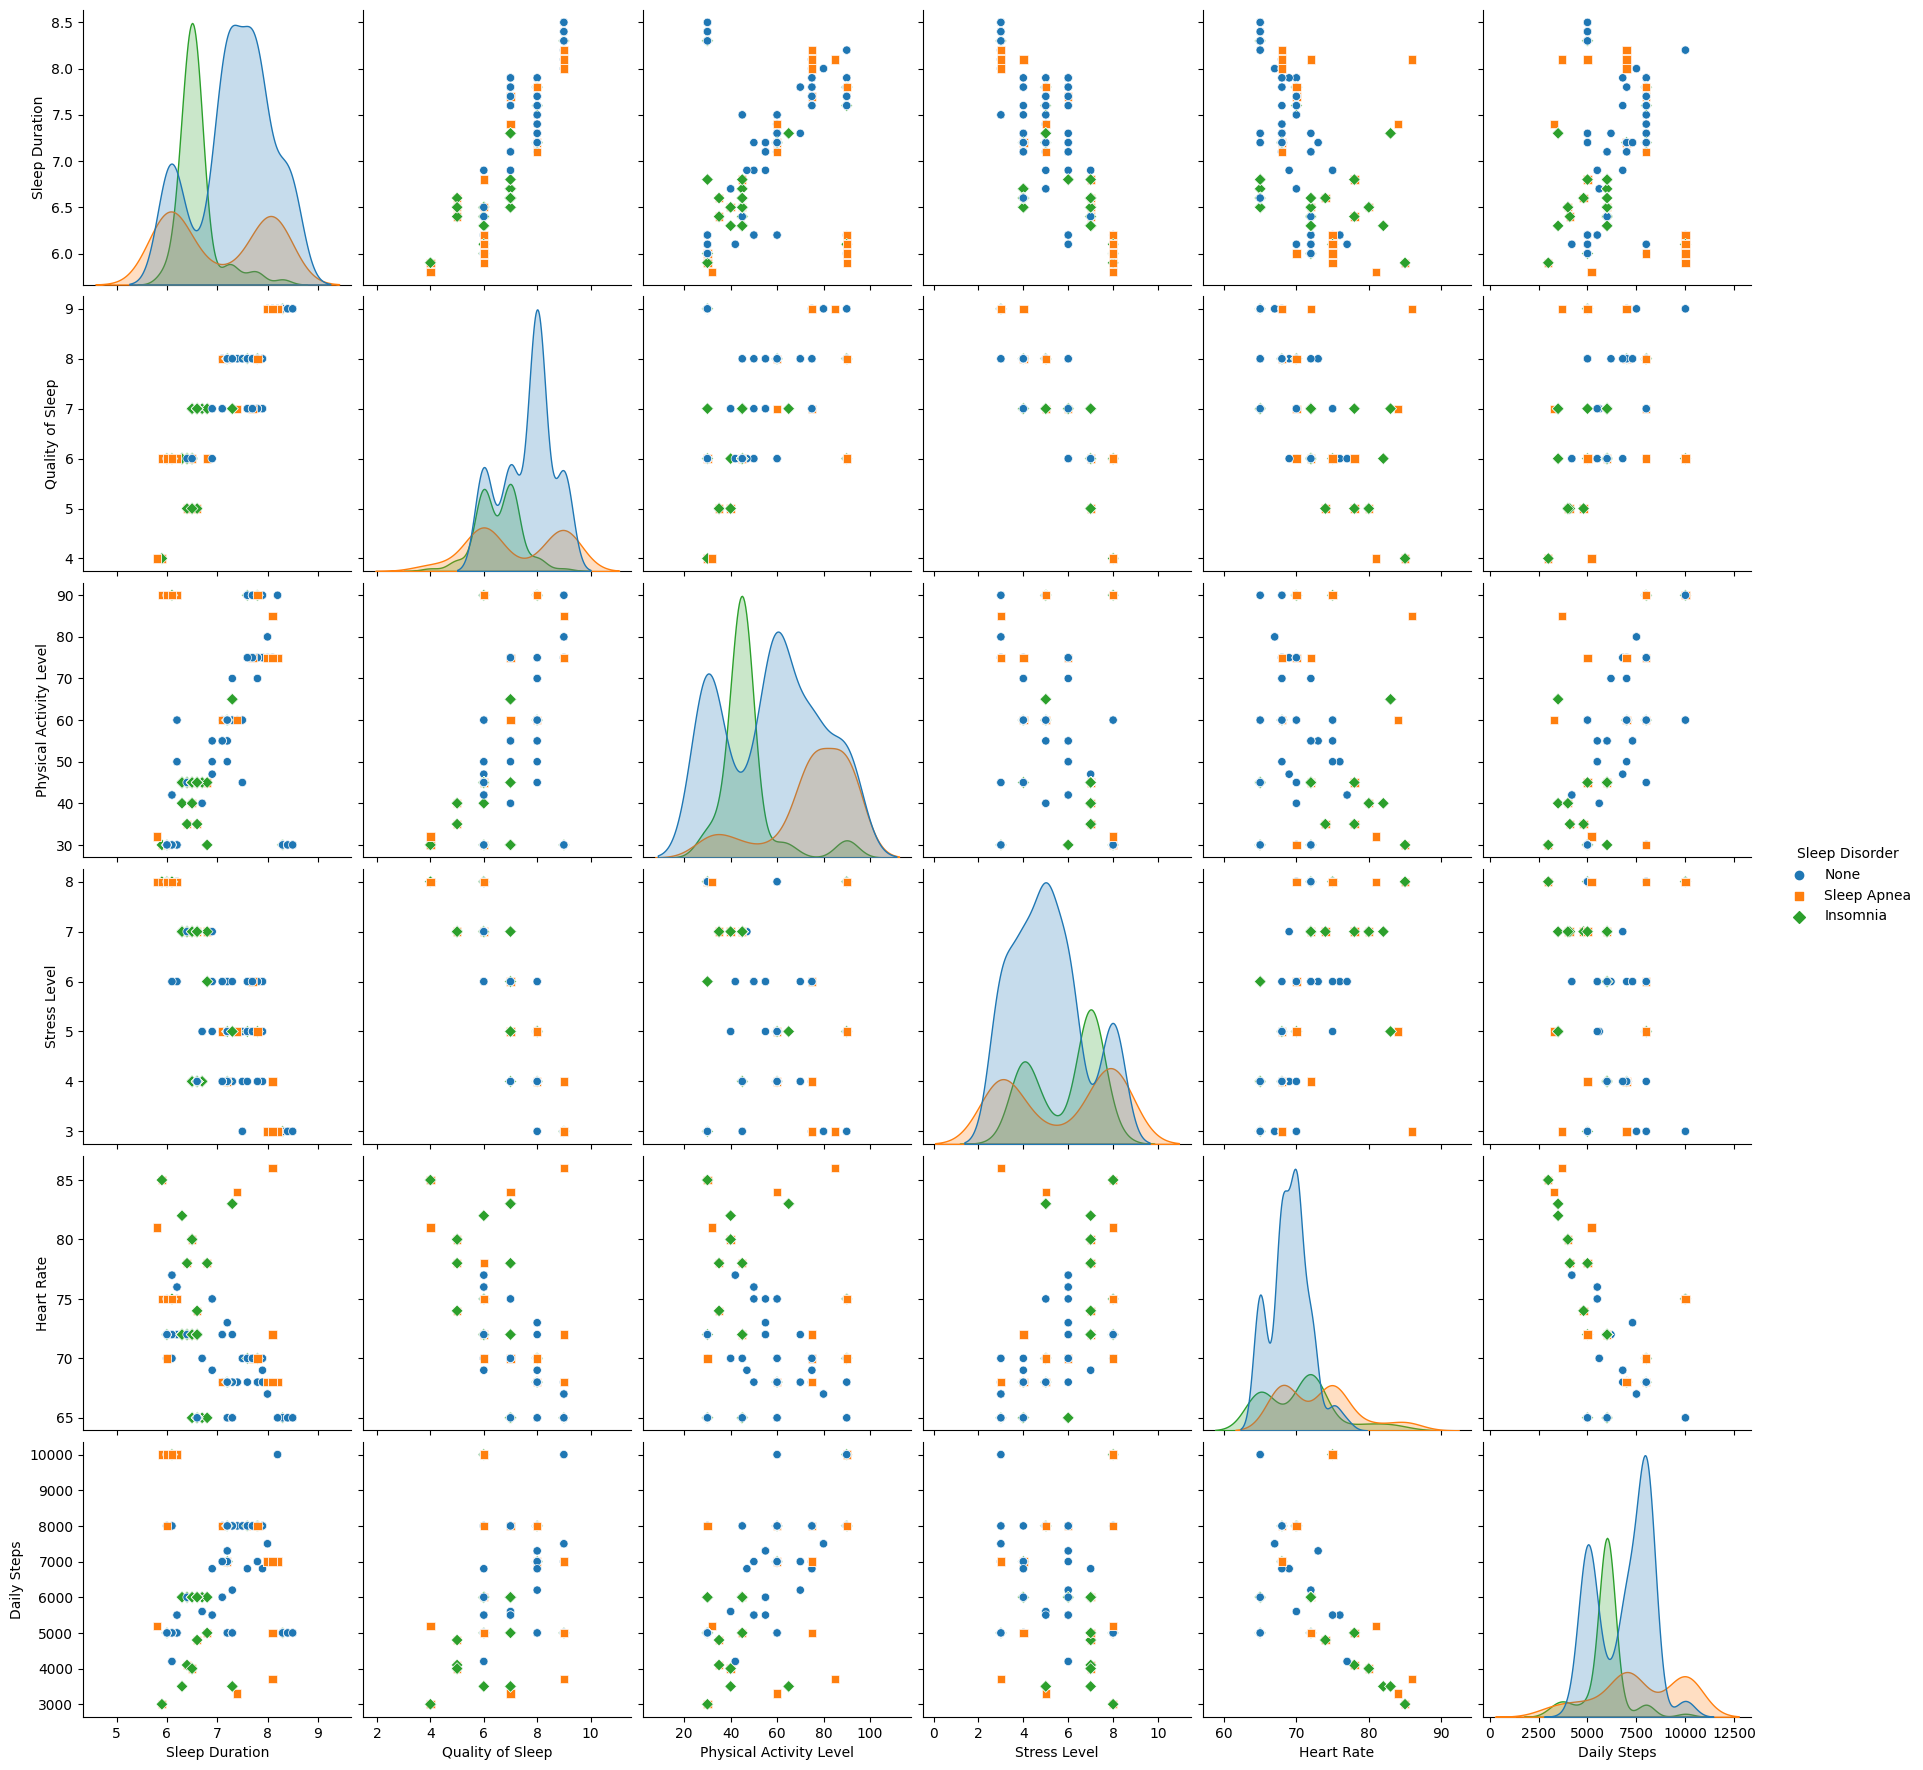

In [9]:
#perbandingan dengan visualisasi data
#untuk yang mengalami masalah tidur berdasarkan durasi tidur, daily steps, heart rate, dll
plt.figure()
sns.pairplot(data.drop("Age", axis=1), hue = "Sleep Disorder", size=3, markers=["o", "s", "D"])
plt.show()

Untuk faktor yang digunakan sebagai prediksi kali ini adalah berdasarkan physical activity level dan heart rate.

In [12]:
#berdasarkan physical activity level dan heart rate
x = data.iloc[:, [5,9]].values
print(x)

[[42 77]
 [60 75]
 [60 75]
 [30 85]
 [30 85]
 [30 85]
 [40 82]
 [75 70]
 [75 70]
 [75 70]
 [30 70]
 [75 70]
 [30 70]
 [30 70]
 [30 70]
 [30 70]
 [40 80]
 [30 70]
 [40 80]
 [75 70]
 [75 70]
 [75 70]
 [75 70]
 [75 70]
 [75 70]
 [75 70]
 [75 70]
 [75 70]
 [75 70]
 [75 70]
 [35 78]
 [35 78]
 [75 69]
 [30 72]
 [75 70]
 [30 72]
 [30 72]
 [75 70]
 [75 70]
 [75 70]
 [75 70]
 [75 70]
 [75 70]
 [75 70]
 [75 70]
 [75 70]
 [75 70]
 [75 70]
 [75 70]
 [75 70]
 [45 70]
 [45 70]
 [30 72]
 [75 70]
 [30 72]
 [30 72]
 [75 70]
 [30 72]
 [30 72]
 [75 70]
 [30 72]
 [30 72]
 [30 72]
 [30 72]
 [30 72]
 [30 72]
 [50 68]
 [30 72]
 [50 76]
 [50 76]
 [30 72]
 [30 72]
 [30 72]
 [30 72]
 [30 72]
 [30 72]
 [30 72]
 [30 72]
 [30 72]
 [30 72]
 [32 81]
 [32 81]
 [40 70]
 [40 70]
 [60 70]
 [60 68]
 [60 65]
 [60 65]
 [60 65]
 [60 65]
 [60 65]
 [60 65]
 [60 70]
 [60 84]
 [60 68]
 [60 68]
 [60 68]
 [60 68]
 [60 68]
 [60 68]
 [60 68]
 [60 68]
 [60 68]
 [35 74]
 [60 68]
 [35 74]
 [42 77]
 [70 68]
 [70 68]
 [60 68]
 [60 68]
 

5. Melakukan model selection untuk membagi data menjadi data training dan data test.

In [13]:
#Split menjadi data training dan data test dengan model selection
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [14]:
len(x_train)

299

In [15]:
len(x_test)

75

6. Mencari k optimal untuk melakukan prediksi dengan menggunakan cross validation score.

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
k_list = list(range(1,30,2))

cv_scores = []

#perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 640x480 with 0 Axes>

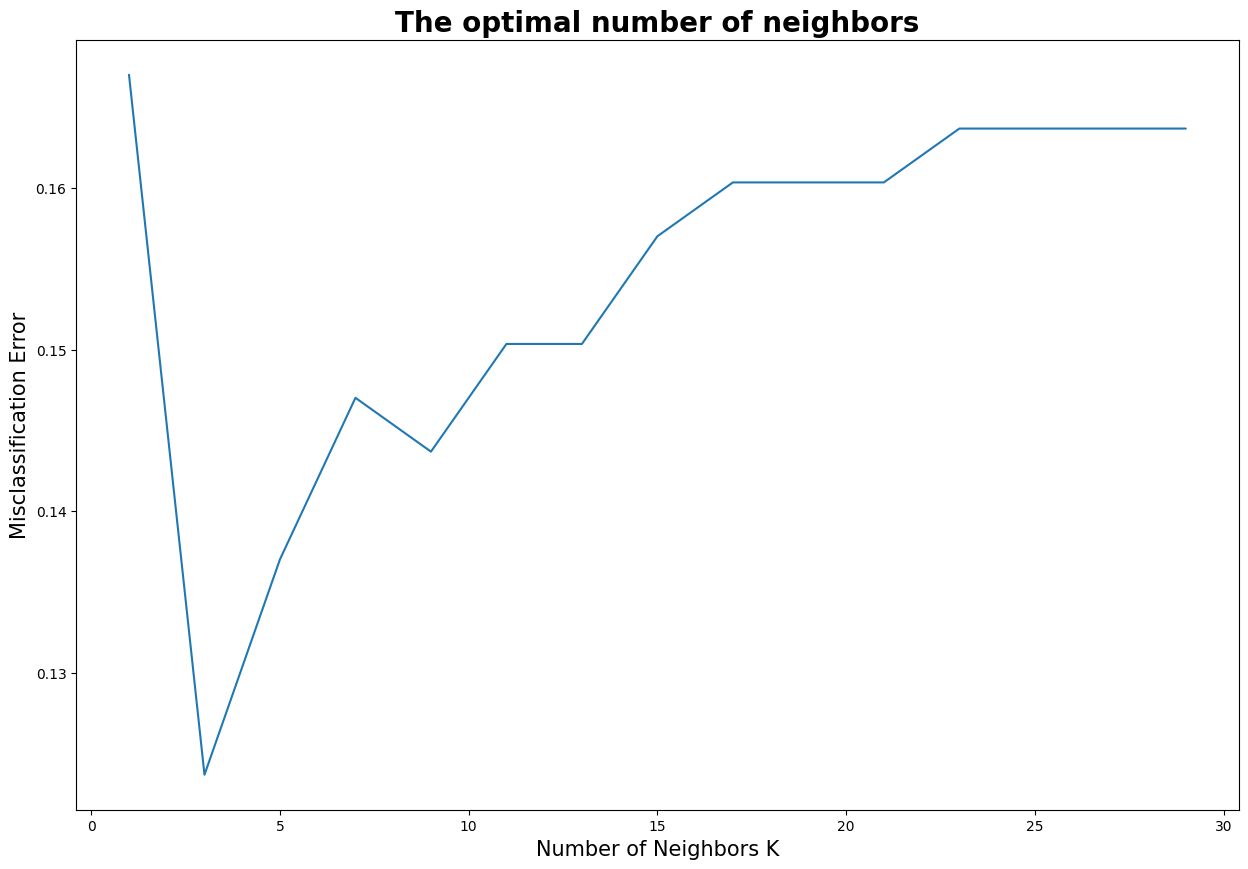

In [17]:
#cek error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [18]:
#k yang paling optimal
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 3.


7. Melakukan perbandingan klasifikasi berdasarkan beberapa angka yang berbeda. (untuk ini menggunakan angka 3, 5, 9, dan 12 sebagai percobaan)

In [19]:
#melakukan classifier dengan membandingkan beberapa k yang berbeda
#k = n_neighbors
classifiern3 = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p=2)
classifiern3.fit(x_train, y_train)

classifiern5 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifiern5.fit(x_train, y_train)

classifiern9 = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p=2)
classifiern9.fit(x_train, y_train)

classifiern12 = KNeighborsClassifier(n_neighbors = 12, metric = 'minkowski', p=2)
classifiern12.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [20]:
y_predn3 = classifiern3.predict(x_test)

y_predn5 = classifiern5.predict(x_test)

y_predn9 = classifiern9.predict(x_test)

y_predn12 = classifiern12.predict(x_test)

In [21]:
print("Hasil prediksi untuk k=3: \n",y_predn3)

print("Hasil prediksi untuk k=5: \n",y_predn5)

print("Hasil prediksi untuk k=9: \n",y_predn9)

print("Hasil prediksi untuk k=12: \n",y_predn12)

print("Data test: \n",y_test)

Hasil prediksi untuk k=3: 
 [1 2 0 1 2 1 0 0 1 1 1 1 1 2 2 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 2 1 1 0 1 0 1
 1 1 1 1 2 0 2 1 1 2 2 2 1 0 1 0 1 1 2 1 1 1 1 0 1 0 0 0 1 1 2 0 0 1 1 1 2
 1]
Hasil prediksi untuk k=5: 
 [1 2 0 1 2 1 0 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 2 1 1 0 1 1 1
 1 1 1 1 2 0 2 1 1 2 2 2 1 0 1 0 1 1 2 1 1 1 1 0 1 0 0 0 1 1 2 0 0 1 1 1 2
 1]
Hasil prediksi untuk k=9: 
 [1 2 0 1 2 1 0 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 0 0 1 1 0 0 2 1 2 1 1 0 1 1 1
 1 1 1 1 2 0 2 1 1 2 2 2 1 0 1 0 1 1 2 1 1 1 1 0 1 0 0 0 1 1 2 0 0 1 1 1 2
 1]
Hasil prediksi untuk k=12: 
 [1 2 0 1 2 1 0 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 0 0 1 1 0 0 2 1 2 1 1 0 1 1 1
 1 1 1 1 2 0 2 1 1 2 2 2 0 0 1 0 1 1 2 1 1 1 1 0 1 0 0 0 1 1 2 0 0 1 1 1 2
 1]
Data test: 
 [1 2 0 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 0 0 1 0 0 1 1 2 0 0 1 2 1 1 0 1 0 1
 2 1 1 1 2 0 2 1 1 2 2 0 1 0 1 0 1 1 2 1 1 1 1 0 0 0 0 0 1 1 2 0 0 1 1 1 2
 1]


8. Melakukan percobaan prediksi gangguan tidur dengan 2 sampel nilai aktivitas level dan detak jantung yang berbeda.

In [77]:
#untuk coba prediksi sleep disorder berdasarkan physical activity dan juga heart ratenya
#dengan x1 = physical activity level dan x2 = heart rate
new_x1 = 30
new_x2 = 85
new_point = [(new_x1, new_x2)]

prediction3 = classifiern3.predict(new_point)
print(prediction3)

prediction5 = classifiern5.predict(new_point)
print(prediction5)

prediction9 = classifiern9.predict(new_point)
print(prediction9)

prediction12 = classifiern12.predict(new_point)
print(prediction12)

[2]
[2]
[2]
[2]


In [76]:
#untuk coba prediksi sleep disorder
#dengan x1 = physical activity level dan x2 = heart rate
new_x1 = 40
new_x2 = 82
new_point = [(new_x1, new_x2)]
prediction3 = classifiern3.predict(new_point)
print(prediction3)

prediction5 = classifiern5.predict(new_point)
print(prediction5)

prediction9 = classifiern9.predict(new_point)
print(prediction9)

prediction12 = classifiern12.predict(new_point)
print(prediction12)

[0]
[0]
[2]
[2]


9. Melakukan pengecekan akurasi prediksi dengan confusion matriks juga tingkat presisi, recall, accuracy, dan f1-score untuk masing-masing nilai k.

In [22]:
#cek akurasi dengan confusion matriks
cm3 = confusion_matrix(y_test, y_predn3)
print("Confusion matriks untuk k=3: \n",cm3)

cm5 = confusion_matrix(y_test, y_predn5)
print("Confusion matriks untuk k=5: \n",cm5)

cm9 = confusion_matrix(y_test, y_predn9)
print("Confusion matriks untuk k=9: \n",cm9)

cm12 = confusion_matrix(y_test, y_predn12)
print("Confusion matriks untuk k=12: \n",cm12)

Confusion matriks untuk k=3: 
 [[16  3  1]
 [ 1 39  1]
 [ 2  1 11]]
Confusion matriks untuk k=5: 
 [[15  4  1]
 [ 1 39  1]
 [ 1  2 11]]
Confusion matriks untuk k=9: 
 [[14  4  2]
 [ 1 39  1]
 [ 1  2 11]]
Confusion matriks untuk k=12: 
 [[14  4  2]
 [ 2 38  1]
 [ 1  2 11]]


In [23]:
#untuk hitung persenan akurasi
akurasin3 = accuracy_score(y_test, y_predn3)*100
print('Akurasi untuk k=3 : ' + str(round(akurasin3, 2)) + '% \n')

akurasin5 = accuracy_score(y_test, y_predn5)*100
print('Akurasi untuk k=5 : ' + str(round(akurasin5, 2)) + '% \n')

akurasin9 = accuracy_score(y_test, y_predn9)*100
print('Akurasi untuk k=9 : ' + str(round(akurasin9, 2)) + '% \n')

akurasin12 = accuracy_score(y_test, y_predn12)*100
print('Akurasi untuk k=12: ' + str(round(akurasin12, 2)) + '% \n')

Akurasi untuk k=3 : 88.0% 

Akurasi untuk k=5 : 86.67% 

Akurasi untuk k=9 : 85.33% 

Akurasi untuk k=12: 84.0% 



In [24]:
#untuk k=3
from sklearn.metrics import classification_report
print (classification_report(y_test, y_predn3))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        20
           1       0.91      0.95      0.93        41
           2       0.85      0.79      0.81        14

    accuracy                           0.88        75
   macro avg       0.87      0.85      0.85        75
weighted avg       0.88      0.88      0.88        75



In [25]:
#untuk k=5
from sklearn.metrics import classification_report
print (classification_report(y_test, y_predn5))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        20
           1       0.87      0.95      0.91        41
           2       0.85      0.79      0.81        14

    accuracy                           0.87        75
   macro avg       0.87      0.83      0.84        75
weighted avg       0.87      0.87      0.86        75



In [26]:
#untuk k=9
from sklearn.metrics import classification_report
print (classification_report(y_test, y_predn9))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        20
           1       0.87      0.95      0.91        41
           2       0.79      0.79      0.79        14

    accuracy                           0.85        75
   macro avg       0.84      0.81      0.82        75
weighted avg       0.85      0.85      0.85        75



In [27]:
#untuk k=12
from sklearn.metrics import classification_report
print (classification_report(y_test, y_predn12))

              precision    recall  f1-score   support

           0       0.82      0.70      0.76        20
           1       0.86      0.93      0.89        41
           2       0.79      0.79      0.79        14

    accuracy                           0.84        75
   macro avg       0.82      0.80      0.81        75
weighted avg       0.84      0.84      0.84        75

